In [1]:
from scripts.shared_utilities import *

2024-06-26 22:37:08.890366: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-26 22:37:08.894322: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-26 22:37:08.948621: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-26 22:37:09.816024: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
model = KerasLSTMModel(path=Path("../models/modello-passi-sonno-LSTM.keras"),load=True)
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 48, 2)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 48, 20)         │           100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 48, 20)         │           820 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 48, 20)         │           820 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 48, 20)         │           820 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_4 (Conv1D)               │ (None, 48, 20)         │           820 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_5 (Conv1D)               │ (None, 48, 20)         │           820 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_6 (Conv1D)               │ (None, 48, 20)         │           820 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_7 (Conv1D)               │ (None, 48, 20)         │           820 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 960)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           961 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,801 (26.57 KB)

 Trainable params: 6,801 (26.57 KB)

 Non-trainable params: 0 (0.00 B)

In [3]:
data = DateStepSleepData(dataset_chunk=DEFAULT_CHUNK_SIZE,sleep_score="mn_sleep_score_all")
data.get_dataset().head()

,uuid,date,steps,sleep_score,n_date,n_steps_all,n_sleep_score_all,m_steps,dm_steps,mn_steps_all,dmn_steps_all,m_sleep_score,dm_sleep_score,mn_sleep_score_all,dmn_sleep_score_all
0,1003e58667235e01b49008155604980b3900b00e,2016-07-31,3049.04,NaN,0.332418,-0.866270,NaN,3243.864,NaN,-0.825126,NaN,NaN,NaN,NaN,NaN
1,1003e58667235e01b49008155604980b3900b00e,2016-08-01,4309.81,0.547576,0.335165,-0.600012,-0.367737,3673.029,429.165,-0.734492,0.090634,NaN,NaN,NaN,NaN
2,1003e58667235e01b49008155604980b3900b00e,2016-08-02,255.11,NaN,0.337912,-1.456310,NaN,4083.098,410.069,-0.647891,0.086601,NaN,NaN,NaN,NaN
3,1003e58667235e01b49008155604980b3900b00e,2016-08-03,5118.07,NaN,0.340659,-0.429319,NaN,4295.129,212.031,-0.603113,0.044778,NaN,NaN,NaN,NaN
4,1003e58667235e01b49008155604980b3900b00e,2016-08-04,2228.88,0.415384,0.343407,-1.039477,-1.259176,4306.411,11.282,-0.600730,0.002383,NaN,NaN,NaN,NaN


In [4]:
utils = Utilities(model, data)

In [5]:
utils.train_model()

Epoch 1/20
990/990 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.3049 - r2_score: 0.0198 - val_loss: 0.4269 - val_r2_score: -0.4944
Epoch 2/20
990/990 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.1646 - r2_score: 0.4706 - val_loss: 0.3955 - val_r2_score: -0.3843
Epoch 3/20
990/990 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.1190 - r2_score: 0.6194 - val_loss: 0.4512 - val_r2_score: -0.5793
Epoch 4/20
990/990 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0996 - r2_score: 0.6731 - val_loss: 0.4161 - val_r2_score: -0.4564
Epoch 5/20
990/990 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0914 - r2_score: 0.7082 - val_loss: 0.4369 - val_r2_score: -0.5292
Epoch 6/20
990/990 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0829 - r2_score: 0.7319 - val_loss: 0.3934 - val_r2_score: -0.3770
Epoch 7/20
990/990 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0760 - r2_score: 0.7591 - val_loss: 0.4270 - val_r2_score: -0.4946
Epoch 8/20
990/990 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0725 - r2_score: 0.7675 - val_loss:

In [11]:
utils.evaluate_model()

In [7]:
model.save()

Qui si prova la stessa cosa di prima, ma con un modello ricorrente, anche qui i risultati sono molto migliorati grazie ai dati medi, ma il risultato non è buono quanto quello della rete convoluzionale.

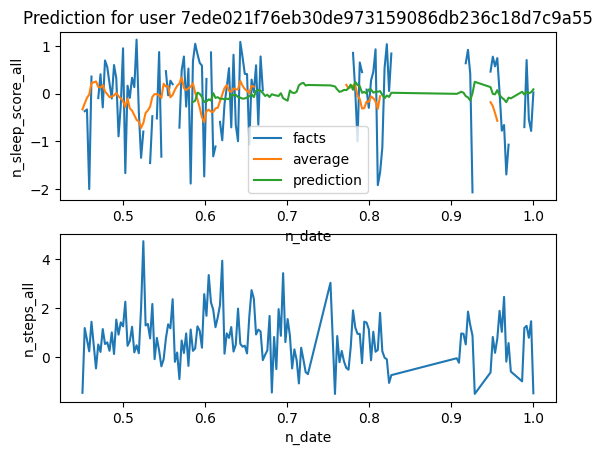

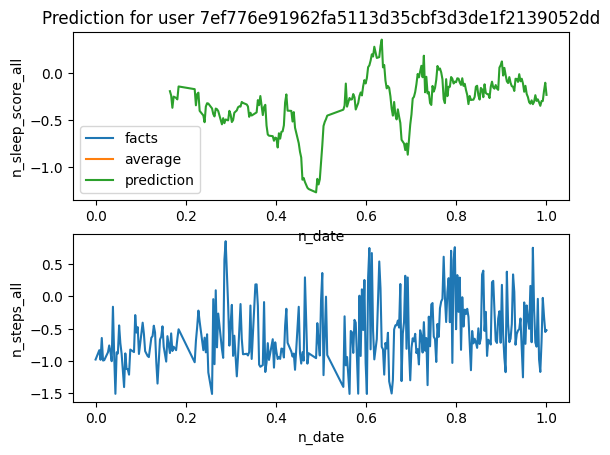

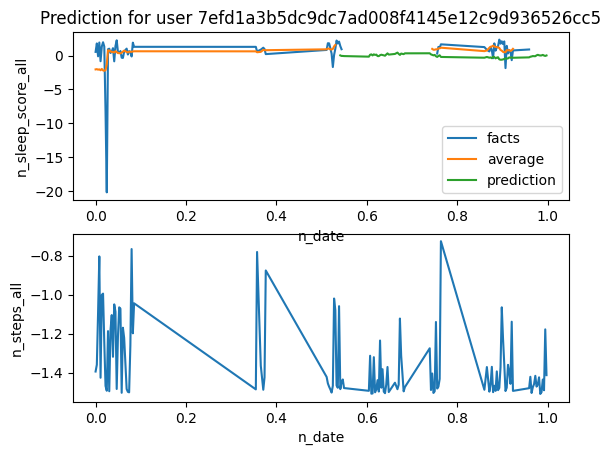

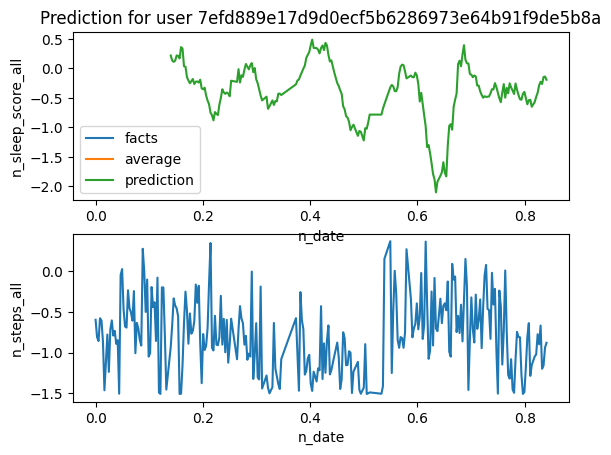

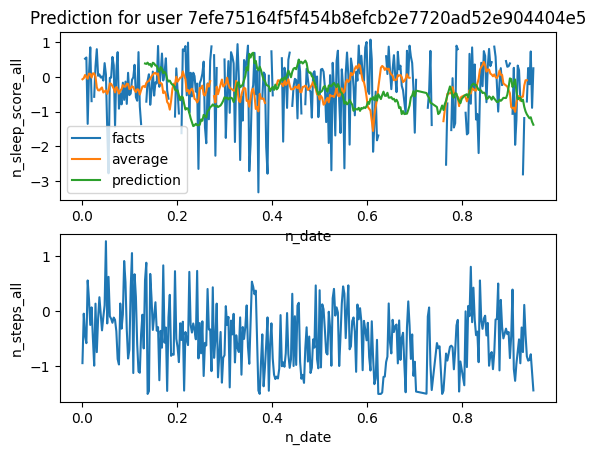

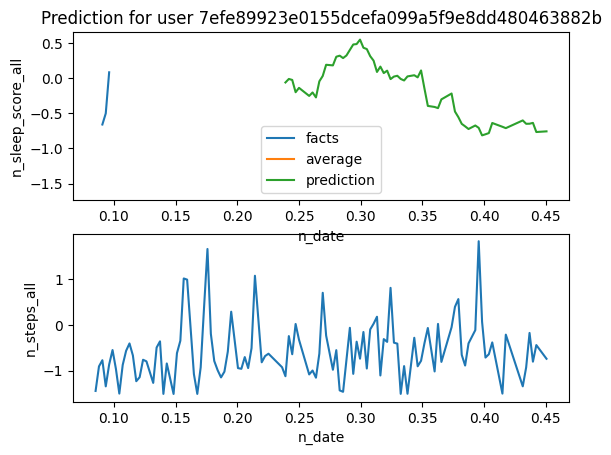

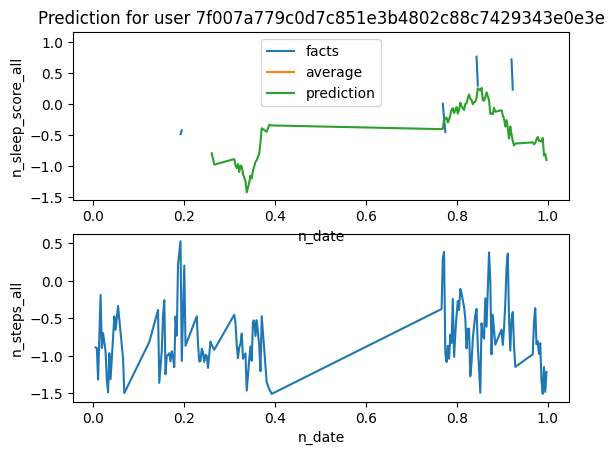

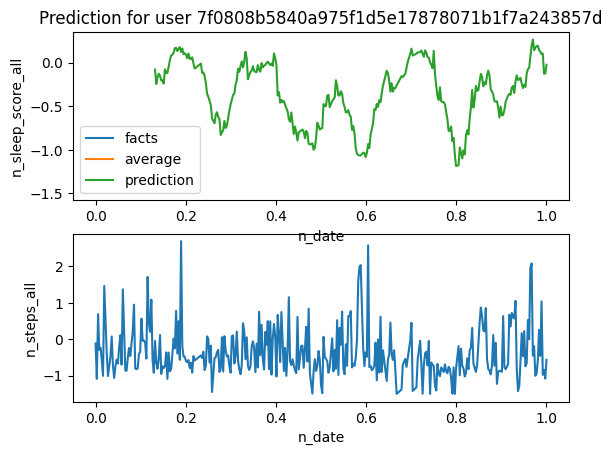

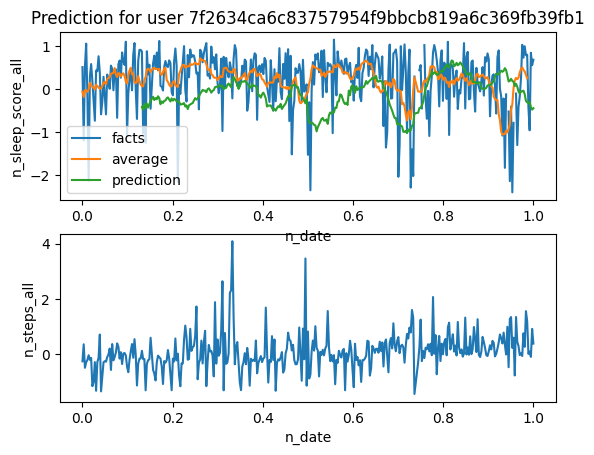

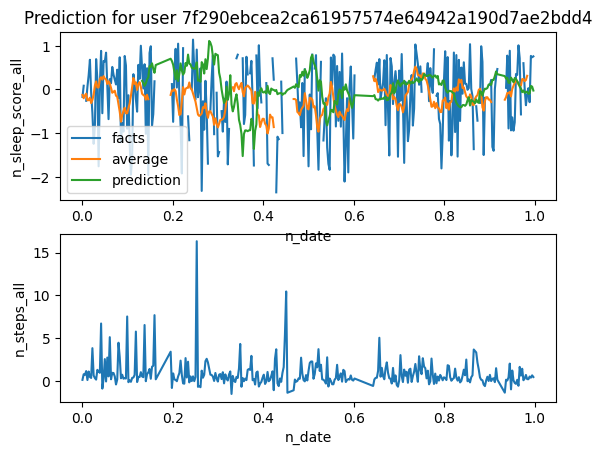

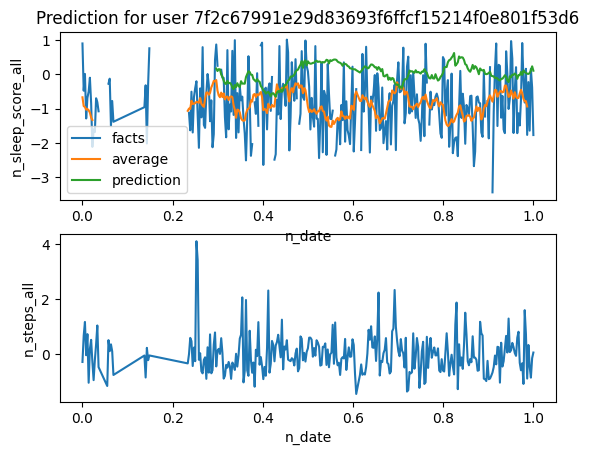

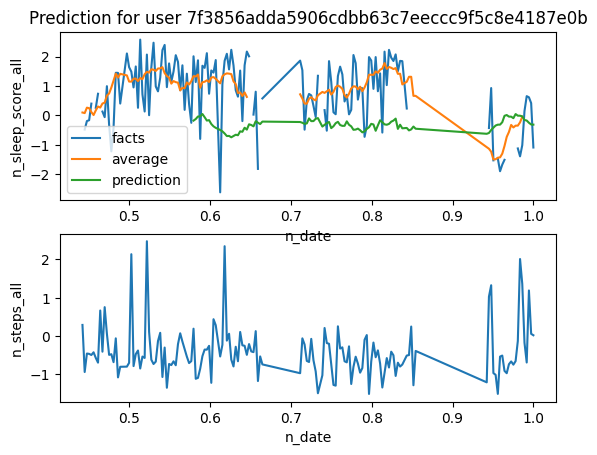

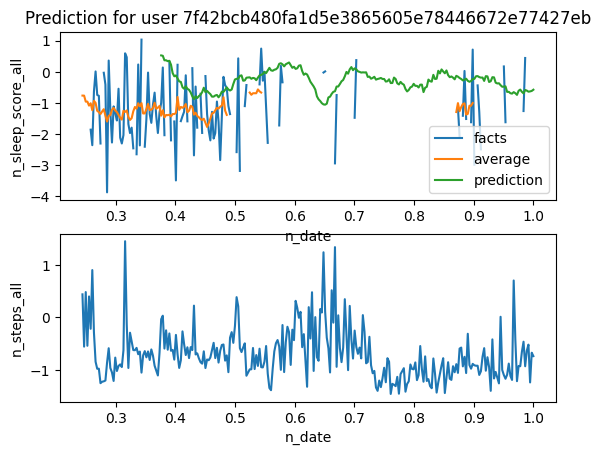

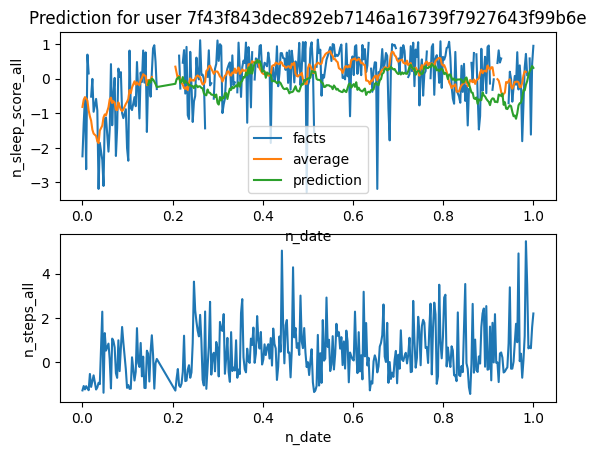

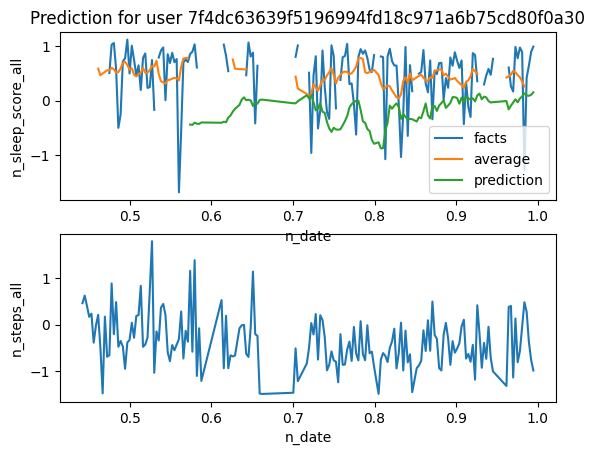

In [8]:
DateMeanSleepStepPredictionVisualization(model, data = DateStepSleepData(sleep_score="n_sleep_score_all",chunk_start=DEFAULT_CHUNK_START+DEFAULT_CHUNK_SIZE*10)).visualize()